# Data From https://www.kaggle.com/dumburanjith/house-sales-prediction-and-classification

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor

# Loading the Data

In [23]:
df = pd.read_csv("house_data.csv")

In [24]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
df.shape

(21613, 21)

In [26]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [27]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [28]:
df = df.drop(["id", "date", "zipcode"], axis = 1)

In [29]:
df.head()

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
df.dtypes

In [30]:
df.shape

(21613, 18)

# Data Visualization

In [31]:
bedrooms_count = df.bedrooms.value_counts()
bedrooms_count

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

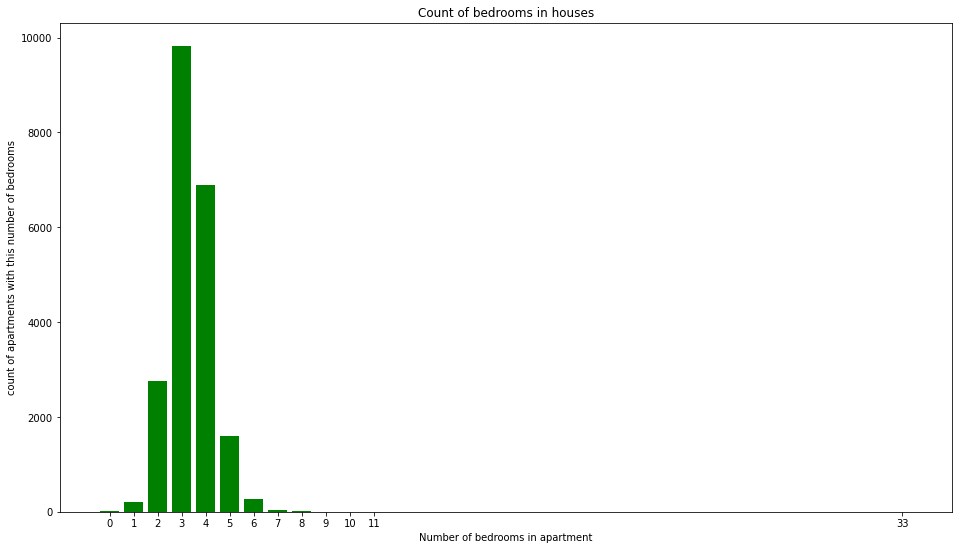

In [32]:
fig = plt.figure(figsize=(16, 9))
plt.title("Count of bedrooms in houses")
plt.xlabel("Number of bedrooms in apartment")
plt.ylabel("count of apartments with this number of bedrooms")
plt.xticks(bedrooms_count.index.values)
plt.bar(bedrooms_count.index, bedrooms_count.values, color="g")
plt.savefig("bedrooms_count.png")

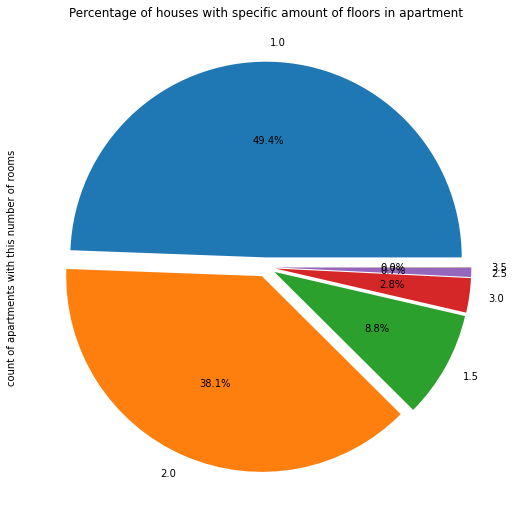

In [33]:
floors_count = df.floors.value_counts()
floors_unique = df.floors.unique()
fig = plt.figure(figsize=(16, 9))
plt.title("Percentage of houses with specific amount of floors in apartment")
plt.ylabel("count of apartments with this number of rooms")
plt.pie(floors_count, labels=floors_unique, autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05))
plt.savefig("floors_percentage.png")

# Data Preparation

In [34]:
y = df.price
X = df.drop("price", axis=1)

In [35]:
for column in X.columns:
    scaler_x = MinMaxScaler()
    X[column] = scaler_x.fit_transform(X[column].to_numpy().reshape(-1, 1))

In [36]:
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1))
y = y.reshape(-1)

In [37]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.571498,0.217608,0.161934,0.005742
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.908959,0.166113,0.222165,0.008027
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.936143,0.237542,0.399415,0.008513
3,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.586939,0.104651,0.165376,0.004996
4,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.741354,0.393688,0.241094,0.007871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.090909,0.31250,0.093585,0.000370,0.8,0.0,0.0,0.5,0.583333,0.135965,0.000000,0.947826,0.000000,0.874055,0.143688,0.194631,0.000986
21609,0.121212,0.31250,0.152453,0.003206,0.4,0.0,0.0,0.5,0.583333,0.221491,0.000000,0.991304,0.000000,0.570693,0.130399,0.246257,0.007523
21610,0.060606,0.09375,0.055094,0.000503,0.4,0.0,0.0,0.5,0.500000,0.080044,0.000000,0.947826,0.000000,0.705324,0.182724,0.106866,0.001558
21611,0.090909,0.31250,0.098868,0.001132,0.4,0.0,0.0,0.5,0.583333,0.143640,0.000000,0.904348,0.000000,0.608975,0.373754,0.173980,0.000731


In [38]:
y

array([0.01926557, 0.06072131, 0.01377049, ..., 0.04289849, 0.04262295,
       0.03278689])

In [39]:
X.shape, y.shape

((21613, 17), (21613,))

In [40]:
def create_models() -> set:
    """
    This function creates set of models.
    :return: set that contains all the models.
    """
    models = {
        "LinearRegression" : {
            "model" : LinearRegression(),
            "params": {
                "n_jobs": [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                "positive" : [True, False]
            }
        },
        "Ridge" : {
            "model" : Ridge(),
            "params" : {
                "solver" : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                "max_iter" : [x for x in range(1000, 1100)],
                "alpha" : [x / 10 for x in range(1, 30)]
            }
        },
        "RandomForestRegressor" : {
            "model" : RandomForestRegressor(),
            "params" : {
                "n_estimators" : [x for x in range(100, 200)]
            }
        },
        "DecisionTreeRegressor": {
            "model" : DecisionTreeRegressor(),
            "params" : {
                "max_depth" : [None, 10, 20, 30, 40, 50],
                "splitter": ["best", "random"]
            }
        }
    }

    return models

In [41]:
def grid_searcher(models: set, X, y) -> list:
    """
    This function checks what are the best models and what are the best params.
    :param models: set of the models.
    :param X: X data.
    :param y: y data.
    :return: list of model names, best params for that model, and best score for that model.
    """
    model_params = []
    for model_name, model_values in models.items():
        searcher = GridSearchCV(model_values["model"], model_values["params"], cv=4, return_train_score=False)
        searcher.fit(X, y)
        model_params.append(dict(model_name=model_name, best_params=searcher.best_params_, best_score=searcher.best_score_))

        print(model_name) # Tracking where the training process is.
        print(model_params[-1])
        print()

    return model_params

In [42]:
models = create_models()
best_model_params = grid_searcher(models, X, y)

LinearRegression
{'model_name': 'LinearRegression', 'best_params': {'n_jobs': None, 'positive': False}, 'best_score': 0.6900558320905714}

Ridge
{'model_name': 'Ridge', 'best_params': {'alpha': 1.8, 'max_iter': 1079, 'solver': 'saga'}, 'best_score': 0.690266799408314}

RandomForestRegressor
{'model_name': 'RandomForestRegressor', 'best_params': {'n_estimators': 163}, 'best_score': 0.8695996291106918}

DecisionTreeRegressor
{'model_name': 'DecisionTreeRegressor', 'best_params': {'max_depth': 10, 'splitter': 'best'}, 'best_score': 0.7754586661266084}



In [47]:
svr_model_1 = { "SVR" : {
    "model" : SVR(),
    "params" : {
        "kernel" : ['linear'],
        "gamma" : ['scale', 'auto'],
        "degree" : [2, 3, 4, 5, 6],
        "C" : [x / 10 for x in range(1, 20, 2)]
    }
}}
svr_model_2 = { "SVR" : {
    "model" : SVR(),
    "params" : {
        "kernel" : ['poly'],
        "gamma" : ['scale', 'auto'],
        "degree" : [2, 3, 4, 5, 6],
        "C" : [x / 10 for x in range(1, 20, 2)]
    }
}}
svr_model_3 = { "SVR" : {
    "model" : SVR(),
    "params" : {
        "kernel" : ['rbf'],
        "gamma" : ['scale', 'auto'],
        "degree" : [2, 3, 4, 5, 6],
        "C" : [x / 10 for x in range(1, 20, 2)]
    }
}}
svr_model_4 = { "SVR" : {
    "model" : SVR(),
    "params" : {
        "kernel" : ['sigmoid'],
        "gamma" : ['scale', 'auto'],
        "degree" : [2, 3, 4, 5, 6],
        "C" : [x / 10 for x in range(1, 20)]
    }
}}
best_model_params.append(grid_searcher(svr_model_1, X, y))
best_model_params.append(grid_searcher(svr_model_2, X, y))
best_model_params.append(grid_searcher(svr_model_3, X, y))
best_model_params.append(grid_searcher(svr_model_4, X, y))

SVR
{'model_name': 'SVR', 'best_params': {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}, 'best_score': 0.5273359069710954}

SVR
{'model_name': 'SVR', 'best_params': {'C': 0.7, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}, 'best_score': 0.520078349260735}

SVR
{'model_name': 'SVR', 'best_params': {'C': 1.9, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}, 'best_score': 0.5759517805359515}

SVR
{'model_name': 'SVR', 'best_params': {'C': 1.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid'}, 'best_score': 0.49837509773654803}



In [72]:
best_model_params

[{'model_name': 'LinearRegression',
  'best_params': {'n_jobs': None, 'positive': False},
  'best_score': 0.6900558320905714},
 {'model_name': 'Ridge',
  'best_params': {'alpha': 1.8, 'max_iter': 1079, 'solver': 'saga'},
  'best_score': 0.690266799408314},
 {'model_name': 'RandomForestRegressor',
  'best_params': {'n_estimators': 163},
  'best_score': 0.8695996291106918},
 {'model_name': 'DecisionTreeRegressor',
  'best_params': {'max_depth': 10, 'splitter': 'best'},
  'best_score': 0.7754586661266084},
 [{'model_name': 'SVR',
   'best_params': {'C': 0.1,
    'degree': 2,
    'gamma': 'scale',
    'kernel': 'linear'},
   'best_score': 0.5273359069710954}],
 [{'model_name': 'SVR',
   'best_params': {'C': 0.7, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'},
   'best_score': 0.520078349260735}],
 [{'model_name': 'SVR',
   'best_params': {'C': 1.9, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'},
   'best_score': 0.5759517805359515}],
 [{'model_name': 'SVR',
   'best_params': {'C': 1.0,
 

In [73]:
def fit_list_best_model_params(best_model_params: list) -> list:
    """
    This function fixes best_model_params list.
    :param best_model_params: list which we want to fix
    :return: list, fixed list.
    """

    best_model_params_new = []

    for item in best_model_params:
        if type(item) is list:
            best_model_params_new.append(item[0])
        else:
            best_model_params_new.append(item)

    return best_model_params_new

In [74]:
best_model_params_new = fit_list_best_model_params(best_model_params)
best_model_params_new


[{'model_name': 'LinearRegression',
  'best_params': {'n_jobs': None, 'positive': False},
  'best_score': 0.6900558320905714},
 {'model_name': 'Ridge',
  'best_params': {'alpha': 1.8, 'max_iter': 1079, 'solver': 'saga'},
  'best_score': 0.690266799408314},
 {'model_name': 'RandomForestRegressor',
  'best_params': {'n_estimators': 163},
  'best_score': 0.8695996291106918},
 {'model_name': 'DecisionTreeRegressor',
  'best_params': {'max_depth': 10, 'splitter': 'best'},
  'best_score': 0.7754586661266084},
 {'model_name': 'SVR',
  'best_params': {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'},
  'best_score': 0.5273359069710954},
 {'model_name': 'SVR',
  'best_params': {'C': 0.7, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'},
  'best_score': 0.520078349260735},
 {'model_name': 'SVR',
  'best_params': {'C': 1.9, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'},
  'best_score': 0.5759517805359515},
 {'model_name': 'SVR',
  'best_params': {'C': 1.0, 'degree': 2, 'gamma': 'auto

In [93]:
gbr_model = { "GradientBoostingRegressor" : {
    "model" : GradientBoostingRegressor(),
    "params" : {
        "loss" : ['ls', 'lad', 'huber', 'quantile'],
        "n_estimators" : [75, 100, 125, 150, 175, 200],
        "criterion" : ['friedman_mse', 'mse']
    }
}}

best_model_params_new.append(grid_searcher(gbr_model, X, y)[0])

GradientBoostingRegressor
{'model_name': 'GradientBoostingRegressor', 'best_params': {'criterion': 'mse', 'loss': 'ls', 'n_estimators': 200}, 'best_score': 0.8728357239345698}



In [94]:
best_model_params_new

[{'model_name': 'LinearRegression',
  'best_params': {'n_jobs': None, 'positive': False},
  'best_score': 0.6900558320905714},
 {'model_name': 'Ridge',
  'best_params': {'alpha': 1.8, 'max_iter': 1079, 'solver': 'saga'},
  'best_score': 0.690266799408314},
 {'model_name': 'RandomForestRegressor',
  'best_params': {'n_estimators': 163},
  'best_score': 0.8695996291106918},
 {'model_name': 'DecisionTreeRegressor',
  'best_params': {'max_depth': 10, 'splitter': 'best'},
  'best_score': 0.7754586661266084},
 {'model_name': 'SVR',
  'best_params': {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'},
  'best_score': 0.5273359069710954},
 {'model_name': 'SVR',
  'best_params': {'C': 0.7, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'},
  'best_score': 0.520078349260735},
 {'model_name': 'SVR',
  'best_params': {'C': 1.9, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'},
  'best_score': 0.5759517805359515},
 {'model_name': 'SVR',
  'best_params': {'C': 1.0, 'degree': 2, 'gamma': 'auto

In [95]:
abr = { "AdaBoostingRegressor" : {
    "model" : AdaBoostRegressor(),
    "params" : {
        "loss" : ['linear', 'square', 'exponential'],
        "n_estimators" : [50, 75, 100, 125, 150, 175, 200],
        "learning_rate" : [0.25, 0.5, 0.75, 1]
    }
}}

In [97]:
best_model_params_new.append(grid_searcher(abr, X, y)[0])

AdaBoostingRegressor
{'model_name': 'AdaBoostingRegressor', 'best_params': {'learning_rate': 0.25, 'loss': 'exponential', 'n_estimators': 50}, 'best_score': 0.6383582070027236}



In [98]:
best_model_params_new

[{'model_name': 'LinearRegression',
  'best_params': {'n_jobs': None, 'positive': False},
  'best_score': 0.6900558320905714},
 {'model_name': 'Ridge',
  'best_params': {'alpha': 1.8, 'max_iter': 1079, 'solver': 'saga'},
  'best_score': 0.690266799408314},
 {'model_name': 'RandomForestRegressor',
  'best_params': {'n_estimators': 163},
  'best_score': 0.8695996291106918},
 {'model_name': 'DecisionTreeRegressor',
  'best_params': {'max_depth': 10, 'splitter': 'best'},
  'best_score': 0.7754586661266084},
 {'model_name': 'SVR',
  'best_params': {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'},
  'best_score': 0.5273359069710954},
 {'model_name': 'SVR',
  'best_params': {'C': 0.7, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'},
  'best_score': 0.520078349260735},
 {'model_name': 'SVR',
  'best_params': {'C': 1.9, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'},
  'best_score': 0.5759517805359515},
 {'model_name': 'SVR',
  'best_params': {'C': 1.0, 'degree': 2, 'gamma': 'auto

In [101]:
br = { "BaggingRegressor" : {
    "model" : BaggingRegressor(),
    "params" : {
        "n_estimators" : [x * 10 for x in range(1, 5)],
        "max_features" : [0.75, 1, 2],
        "bootstrap": [True, False],
        "bootstrap_features": [True, False]
    }
}}
best_model_params_new.append(grid_searcher(br, X, y)[0])

BaggingRegressor
{'model_name': 'BaggingRegressor', 'best_params': {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.75, 'n_estimators': 30}, 'best_score': 0.8547900205387432}



In [102]:
best_model_params_new

[{'model_name': 'LinearRegression',
  'best_params': {'n_jobs': None, 'positive': False},
  'best_score': 0.6900558320905714},
 {'model_name': 'Ridge',
  'best_params': {'alpha': 1.8, 'max_iter': 1079, 'solver': 'saga'},
  'best_score': 0.690266799408314},
 {'model_name': 'RandomForestRegressor',
  'best_params': {'n_estimators': 163},
  'best_score': 0.8695996291106918},
 {'model_name': 'DecisionTreeRegressor',
  'best_params': {'max_depth': 10, 'splitter': 'best'},
  'best_score': 0.7754586661266084},
 {'model_name': 'SVR',
  'best_params': {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'},
  'best_score': 0.5273359069710954},
 {'model_name': 'SVR',
  'best_params': {'C': 0.7, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'},
  'best_score': 0.520078349260735},
 {'model_name': 'SVR',
  'best_params': {'C': 1.9, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'},
  'best_score': 0.5759517805359515},
 {'model_name': 'SVR',
  'best_params': {'C': 1.0, 'degree': 2, 'gamma': 'auto

In [107]:
results = pd.DataFrame(best_model_params_new)
results = results.sort_values(by="best_score", ascending=False)
results

,model_name,best_params,best_score
8,GradientBoostingRegressor,"{'criterion': 'mse', 'loss': 'ls', 'n_estimato...",0.872836
2,RandomForestRegressor,{'n_estimators': 163},0.869600
10,BaggingRegressor,"{'bootstrap': True, 'bootstrap_features': Fals...",0.854790
3,DecisionTreeRegressor,"{'max_depth': 10, 'splitter': 'best'}",0.775459
1,Ridge,"{'alpha': 1.8, 'max_iter': 1079, 'solver': 'sa...",0.690267
0,LinearRegression,"{'n_jobs': None, 'positive': False}",0.690056
9,AdaBoostingRegressor,"{'learning_rate': 0.25, 'loss': 'exponential',...",0.638358
6,SVR,"{'C': 1.9, 'degree': 2, 'gamma': 'auto', 'kern...",0.575952
4,SVR,"{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'ker...",0.527336
5,SVR,"{'C': 0.7, 'degree': 2, 'gamma': 'scale', 'ker...",0.520078


# You don't have to run all the grid seaches. Just copy the best parameters from the csv file and create a model with these parameters.

In [108]:
results.to_csv("best_model_params.csv")
